In [2]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd



In [3]:
drive.mount('/content/drive')

import zipfile
zip_path = '/content/drive/MyDrive/Data_Snakes.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

print("Dataset extracted successfully!")

Mounted at /content/drive
Dataset extracted successfully!


In [4]:
# Data Cleaning

from PIL import Image

train_all_path = '/content/Data_Snakes/train_all'
test_path = '/content/Data_Snakes/test'

def check_images(directory):
    corrupt_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                path = os.path.join(root, file)
                try:
                    img = Image.open(path)
                    img.verify()
                    img = Image.open(path)
                    img.load()
                except Exception as e:
                    corrupt_paths.append(path)
                    print(f"Removing corrupt file: {path}")
                    os.remove(path)
    return corrupt_paths

corrupt_files = check_images(train_all_path)
print(f"\nData Cleaning Complete. Removed {len(corrupt_files)} corrupt files.")

Removing corrupt file: /content/Data_Snakes/train_all/venomous/empty_image.jpg

Data Cleaning Complete. Removed 1 corrupt files.


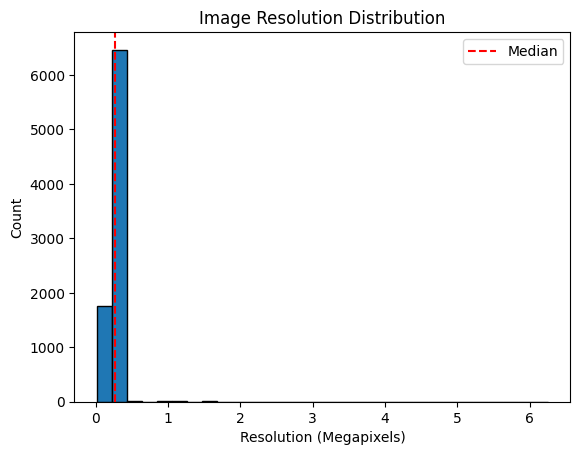

In [5]:
# visualization
sizes = []
for root, _, files in os.walk(train_all_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            with Image.open(os.path.join(root, file)) as img:
                sizes.append(img.size)

df = pd.DataFrame(sizes, columns=["Width", "Height"])
df["MP"] = (df["Width"] * df["Height"]) / 1e6

plt.hist(df["MP"], bins=30, edgecolor="black")
plt.axvline(df["MP"].median(), color="red", linestyle="--", label="Median")
plt.xlabel("Resolution (Megapixels)")
plt.ylabel("Count")
plt.title("Image Resolution Distribution")
plt.legend()
plt.show()